
# FOPPL in Python

by Emil Vassev

February 16, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

<span style="color:blue">Welcome to <b>Introduction to First-Order Probabilistic Programming Language with Python</b>, an interactive lecture designed to give you examples of implementing FOPPL programs in Python.</span>

## Probabilistic Graphical Models

Origin and subject:
* based on correspondences between graph theory and calculus of probability
* deal with random variables: relationships and probability distributions

Definition:
* PGMs provide a graphical representation of probability distributions addressing dependencies between random variables     

<div>
 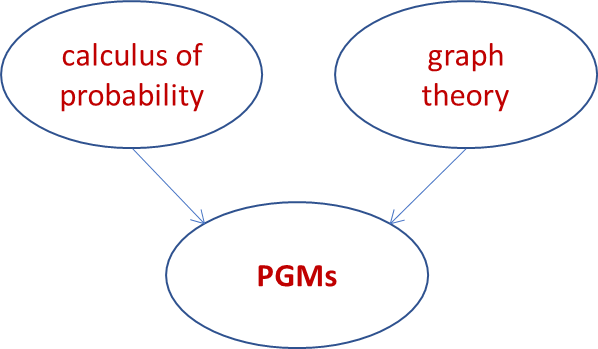
</div>

Structure, Elements & Roles:
* A graph contains a set of nodes (vertices) connected by links (edges or arcs)
* PGM - each node represents a random variable, and links represent probabilistic dependencies between random variables
* PGM - specifies the way in which the joint distribution over all random variables decomposes into a product of factors, where each factor depends on a subset of random variables

Types of Graphical Models:
* Undirected Graphical Models (Markov Random Fields)
* Directed Graphical Models (Bayesian networks)
* Hybrid Graphical Models  - combine directed and undirected graphical models

<div>
 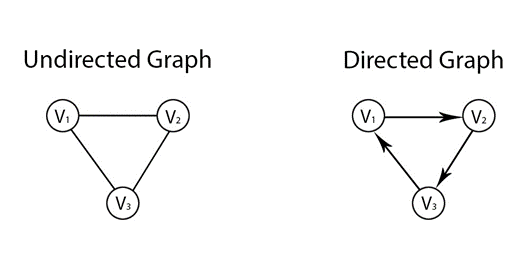
</div>

Features:
* representation: represented by a graph with its nodes being random variables and directed edges being statistical dependency relationships between them
* direction of the edges: determines the influence of one random variable on another 
* causal relationships: can be used to express causal relationships between random variables
* Directed Acyclic Graph (DAG): graph without cycles (closed chain)
* Bayesian Networks: generic name for probabilistic directional graphs
 * DAGs used to describe probability distributions
 * consider joint distribution of variables, e.g, X, Y, Z 
 * consider conditional probability distribution of variables
 * exploit conditional independence of variables 


### Bayesian Networks

Definition:
* Bayesian Network is a DAG with random variables for vertices representing observable or latent random variables of a model
* a variable can be continuous or discrete
* directed edges represent conditional distributions

Distribution models:
* binary values of the vertices - conditional distributions may be Bernoulli
* continuous values of the vertices - conditional distributions may be Gaussian
* joint probability distribution - formulated as a product of conditional or total (marginal) probability distributions

Example: 
* an arbitrary joint distribution over three random variables ```A```,```B```, and ```C```
* product rule of probability: 
	```P(A ∩ B ∩ C) = P(A) * P(B|A) * P(C | B ∩ A)``` , holds for any value of ```A```, ```B``` and ```C``` 
* representing the joint distribution in terms of a simple graphical model:

<div>
 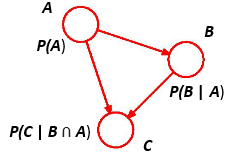
</div>


## First-Order Probabilistic Programming Language (FOPPL)

A language for *Probabilistic Programming*, i.e., the programming denotation of inference problems along with 
evaluators that *solve* those inference problems.

FOPPL programs are models describing distributions over a finite number of random variables

FOPPL compiles any program written in FOPPL to a data structure that represents a graphical model

<span style="color:blue">FOPPL provides a set of translation rules used to compile any FOPPL program to a Probabilistic Graphical Model.</span>

An FOPPL graphical model G as a tuple ```G=(V, A, P, Y)```:
* ```V``` - a set of vertices that represent random variables
* ```A = V × V``` - a set of directed edges that represent conditional dependencies between variables
* ```P``` - a map mapping vertices to deterministic expressions that specify a probability density or mass function for each random variable 
* ```Y``` - a partial map that for each observed random variable contains a deterministic expression ```E``` for the observed value


### FOPPL Grammar

FOPPL includes most of the common features of programming languages:
* conditional statements, e.g., $if$
* primitive operations, e.g., $+$, $-$, $*$, $/$
* user-defined functions: must be first order, i.e., functions cannot accept other functions as arguments cannot be recursive

<div>
 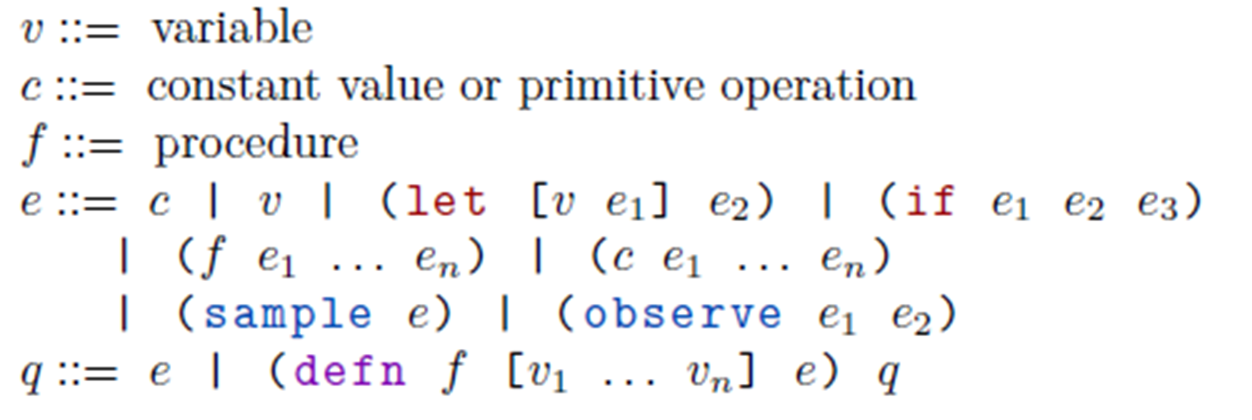
</div>

FOPPL is a Lisp variant that is based on Clojure:
* theare are two sets of production rules: for expressions ```e``` and for programs ```q```
* rules for ```q```: a program can either be a single ```e```, or (```defn f . . .```) followed by ```q```
    
FOPPL expressions:
* constant ```c```: a value of a primitive data type such as a number, string, or Boolean, a built-in primitive function (e.g., ```+```), or a value of any other data type that can be constructed using primitive procedures (lists, vectors, hash-maps, and distributions)
* primitive operation example:  ```(+ a b) --> a + b``` (Python equivalent)
* variable ```v```: a symbol that references the value of another expression in the program
* ```let``` form (```let [v e1] e2```): binds the value of the expression ```e1``` to the variable ```v```, which can then be referenced in the expression ```e2```  (the body of the let expression)
* ```if``` form (```if e1 e2 e3```): takes the value of ```e2``` when the value of ```e1``` is logically true and the value of ```e3``` when ```e1``` is logically: false
* function application (```f e1 . . . en```): calls the user-defined function ```f``` with arguments ```e1``` through ```en```
* primitive procedure applications (```c e1 . . . en```): calls a built-in function ```c```, such as ```+```
* sample form (```sample e```): represents an unobserved random variable; it accepts a single expression ```e```, which must evaluate to a distribution object, and returns a value that is a sample from this distribution
* observe form (```observe e1 e2```) represents an observed random variable; it accepts an argument ```e1```, which must evaluate to a distribution that is a condition for the next argument ```e2``` ,i.e.,  ```P(e2|e1)```

### FOPPL Data Structures

Vector and Map data structures

* vectors: constructed by the expression ```(vector e1 . . . en)``` 

Example: ```(vector 1 2 3 4 5 6)``` – vector defining the die sample space

* hash maps: constructed by the expression ```(hash-map e1 e'1 … en e'n)``` - constructed from a sequence of key-value pairs ```e1 e'1``` 

Functions operating over data structures:
* ```(first e)```: retrieves the first element of a list or vector  ```e ```
* ```(rest e)```
* ```(last e)```
* ```(append e1 e2)```  
* ```(get e1 e2)```: retrieves an element at index  ```e2 ``` from a list or vector  ```e1 ``` , or the element at key  ```e2 ``` from a hash map  ```e1 ```
* ```(put e1 e2 e3)```
* ```(remove e1 e2)```


### FOPPL Loops
For loop syntax

<div>
 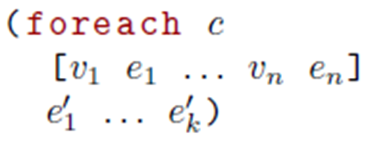
</div>
    
Interpretation:
    
*  ```c ``` is a non-negative integer constant
*  ```foreach ``` form iterates incrementally c-times over the structure  ```[v1 e1 … vn en] ``` where it associates each variable  ```vi ``` with a vector  ```ei ``` and returns the values  ```vi ``` assigned with the  ```c ```-index elements of vectors  ```ei ``` ; consecutively these values  ```vi ```  are passed to the  ```e1' … ek' ``` structure and can be referenced from there

Example:

<div>
 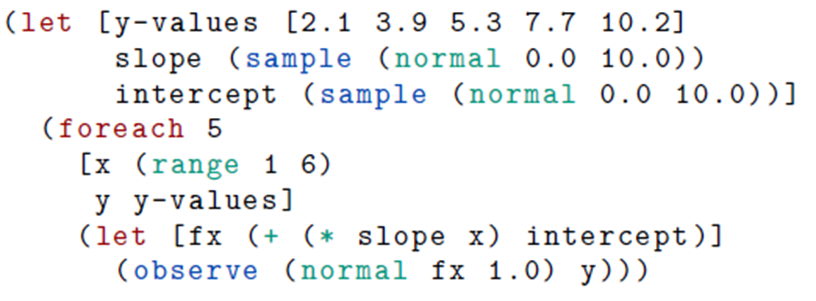
</div>

Interpretation:

* c = 5 (# of iterations)
* iterations and vectors produced:
	* c=0,  x=1, y=2.1
	* c=1,  x=2, y=3.9
	* c=2,  x=3, y=5.3
	* c=3,  x=4, y=7.7
	* c=4,  x=5, y=10.2   

### FOPPL Sampling
Definition: 

<div>
 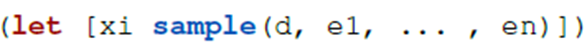
</div>

Interpretation:
* sample from the distribution ```d``` is taken and stored under the name ```xi```
* sample construct accepts a distribution object ```d```, which must evaluate to a distribution object and a set of expressions ```ei``` representing the distribution inputs
* distributions are constructed using primitives provided by the FOPPL

Example:
* ```x  Uniform(0, 1)``` is represented as ```(let [x sample(uniform 0 1)])```
	and returns a value that is a sample from this distribution object
* ```(let [x sample (normal 0.0 1.0)])```
* ```(let [x sample (poisson 10.0)])```


### FOPPL Observe Conditioning Statement
Definition:

<div>
 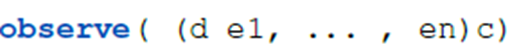
</div>

Interpretation:
1. factors the density according to the distribution ```d```, with ```e1 ,..., en``` and the observed data ```c``` 
2. represents an observed random variable
3. accepts an argument ```d```, which must evaluate to a distribution that provides the conditions on the next argument ```c```
4. output: ```P(c|d)``` 

Examples:
* ```(observe (normal 0 1) 2)``` --> ```P(2 | Normal(0,1))```
* ```(observe (beta 1 5) 2)```  --> ```P(2 | Beta(1,5))```


### FOPPL If Statement

Definition: 
* If statement: ```if ( boolean expr ) expr1 expr2```

Example:
<div>
 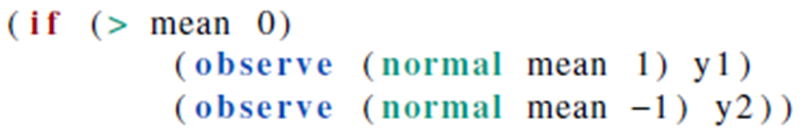
</div>

### FOPPL Function Declaration

Definition: 
* defn statement: ```( defn name [args] (body) )``` 
* takes a set of arguments and a set of expressions in the body to evaluate during the forward execution

Example:
<div>
 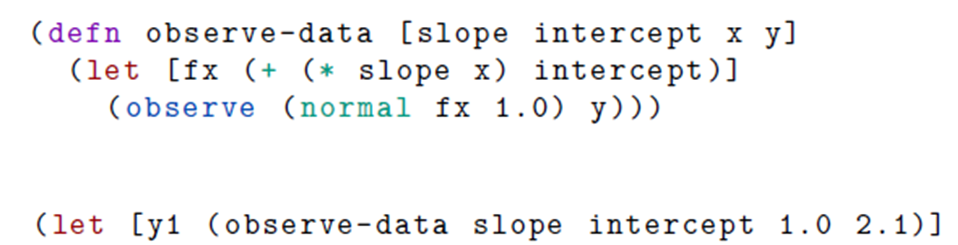
</div>

## FOPPL Programming with Python

* FOPPL programs are models describing distributions over a finite number of random variables.
* We compile any program written in FOPPL to a data structure that represents a graphical model.

### PyFOPPL - FOPPL Python Library

* an FOPPL Python Library developed by Tobias Kohn - GitHub repository: https://github.com/Tobias-Kohn/PyFOPPL
* implementation of an Anglican/Clojure-based First Order Probabilistic Programming Language in Python
* takes an FOPPL-code as input and creates a graph-based model for it
* system requirements: Python 3.4 +, torch, pygraphviz, networkx, matplotlib

### FOPPL Translation to Graphical Model 
Model object ```G=(V, A, P, Y)```: 
* ```V``` - a set of vertices that represent random variables
* ```A = V × V``` - a set of directed edges, i.e., conditional dependencies between variables
* ```P``` - a map mapping vertices to deterministic expressions of probability density or mass function for each random variable 
* ```Y``` - a partial map mapping an observed random variable to deterministic expression ```E``` 

How does it work?

1. We provide an FOPPL model saved as a text file with the extension “.clj” in the parent directory of the PyFOPPL project.
2. We enable FOPPL-auto-imports through “import foppl.imports”.
3. We import the model as a normal Python module, e.g.:
```python
import foppl.imports
import onegauss # import onegauss.clj
```

FOPPL module (program written in FOPPL) integrated in PyFOPPL:
* model - the compiled model as a Python class --> class-methods such as gen_prior_samples()
* graph - the graph created from the original FOPPL  program
* code - the Python-code created from the graph and then compiled into class

In [1]:
import foppl.imports

In [2]:
import onegauss

*onegauss.clj*

```python
(
 let [x (sample (normal 1.0 5.0))
      y (+ x 1)]
 (observe (normal y 2.0) 7.0) 
 y
)
```
Inference problem: characterize the posterior distribution ```p(7.0 | (normal y 2.0))```

Parameters of Normal distribution: 
* $\mu$ (mean) = y
* $\sigma$ (standard deviation) = 2.0

In [3]:
print(help(onegauss.model))

Help on class model in module C:\Eva\Jupyter\CS6462_SEM2_2022-3\Lessons\onegauss.clj:

class model(builtins.object)
 |  Vertices V:
 |    x20001, y20002
 |  Arcs A:
 |    (x20001, y20002)
 |  Conditional densities C:
 |    x20001 -> dist.Normal(mu=1.0, sigma=2.23606797749979)
 |    y20002 -> dist.Normal(mu=(x20001 + 1), sigma=1.4142135623730951)
 |  Observed values O:
 |    y20002 -> 7.0
 |  
 |  Class methods defined here:
 |  
 |  gen_all_keys() from builtins.type
 |  
 |  gen_cond_vars() from builtins.type
 |  
 |  gen_cont_vars() from builtins.type
 |  
 |  gen_disc_vars() from builtins.type
 |  
 |  gen_if_functions() from builtins.type
 |  
 |  gen_if_vars() from builtins.type
 |  
 |  gen_pdf(state) from builtins.type
 |  
 |  gen_prior_samples() from builtins.type
 |  
 |  gen_vars() from builtins.type
 |  
 |  get_arcs() from builtins.type
 |  
 |  get_cond_functions() from builtins.type
 |  
 |  get_continuous_distributions() from builtins.type
 |  
 |  get_discrete_distribut

In [4]:
print(onegauss.code)

#
# Generated: 2023-02-16 07:28:14.228552
#
import math
import numpy as np

class model(object):
	"""
	Vertices V:
	  x20001, y20002
	Arcs A:
	  (x20001, y20002)
	Conditional densities C:
	  x20001 -> dist.Normal(mu=1.0, sigma=2.23606797749979)
	  y20002 -> dist.Normal(mu=(x20001 + 1), sigma=1.4142135623730951)
	Observed values O:
	  y20002 -> 7.0
	"""

	@classmethod
	def get_vertices(self):
		vertices = {'y20002', 'x20001'}
		return list(vertices)

	@classmethod
	def get_arcs(self):
		arcs = {('x20001', 'y20002')}
		return list(arcs)

	@classmethod
	def get_discrete_distributions(self):
		disc_dists = {}
		return disc_dists

	@classmethod
	def get_continuous_distributions(self):
		cont_dists = {
		  'x20001': 'Normal'
		}
		return cont_dists

	@classmethod
	def get_cond_functions(self):
		cond_functions = {}
		return cond_functions

	@classmethod
	def get_dist_parameter_size(self, name):
		dist_sizes = {}
		if name in dist_sizes:
			return dist_sizes[name]
		else:
			return None

	@cl

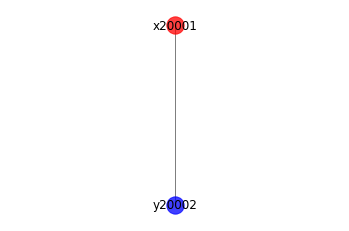

True

In [5]:
model = onegauss.model
model.graph.draw_graph()

In [6]:
import if_model

*if_model.clj*

```python
(
  let [x1 (sample (normal 0 2))
       x2 (sample (normal 0 4))]
  
  (if (> x1 0)
     (observe (normal x2 1) 1)
     (observe (normal -1 1) 1))
  
  x1
)
```
inference problem: characterize the posterior distribution ```p(1 | (normal x2 1))``` or ```p(1 | (normal -1 1))```

Parameters of Normal distribution: 

* $\mu$ (mean) = x2
* $\sigma$ (standard deviation) = 1

or

* $\mu$ (mean) = -1
* $\sigma$ (standard deviation) = 1


In [7]:
print(help(if_model.model))

Help on class model in module C:\Eva\Jupyter\CS6462_SEM2_2022-3\Lessons\if_model.clj:

class model(builtins.object)
 |  Vertices V:
 |    c20003, cond_20004, f20005, x20001, x20002, y20006, y20007
 |  Arcs A:
 |    (f20005, cond_20004), (x20001, f20005), (x20001, c20003), (x20002, c20003), (cond_20004, y20007), (f20005, c20003), (y20007, c20003), (cond_20004, y20006), (x20002, y20007), (cond_20004, c20003), (y20006, c20003)
 |  Conditional densities C:
 |    x20001 -> dist.Normal(mu=0, sigma=1.4142135623730951)
 |    f20005 -> -x20001
 |    cond_20004 -> (f20005 >= 0).data[0]
 |    y20006 -> dist.Normal(mu=-1, sigma=1.0)
 |    x20002 -> dist.Normal(mu=0, sigma=2.0)
 |    y20007 -> dist.Normal(mu=x20002, sigma=1.0)
 |    c20003 -> y20006 if cond_20004 else y20007
 |  Observed values O:
 |    y20006 -> 1
 |    y20007 -> 1
 |  
 |  Class methods defined here:
 |  
 |  gen_all_keys() from builtins.type
 |  
 |  gen_cond_vars() from builtins.type
 |  
 |  gen_cont_vars() from builtins.type


In [8]:
print(if_model.code)

#
# Generated: 2023-02-16 07:28:24.687972
#
import math
import numpy as np

class model(object):
	"""
	Vertices V:
	  c20003, cond_20004, f20005, x20001, x20002, y20006, y20007
	Arcs A:
	  (f20005, cond_20004), (x20001, f20005), (x20001, c20003), (x20002, c20003), (cond_20004, y20007), (f20005, c20003), (y20007, c20003), (cond_20004, y20006), (x20002, y20007), (cond_20004, c20003), (y20006, c20003)
	Conditional densities C:
	  x20001 -> dist.Normal(mu=0, sigma=1.4142135623730951)
	  f20005 -> -x20001
	  cond_20004 -> (f20005 >= 0).data[0]
	  y20006 -> dist.Normal(mu=-1, sigma=1.0)
	  x20002 -> dist.Normal(mu=0, sigma=2.0)
	  y20007 -> dist.Normal(mu=x20002, sigma=1.0)
	  c20003 -> y20006 if cond_20004 else y20007
	Observed values O:
	  y20006 -> 1
	  y20007 -> 1
	"""

	@classmethod
	def get_vertices(self):
		vertices = {'y20007', 'x20001', 'f20005', 'cond_20004', 'y20006', 'x20002', 'c20003'}
		return list(vertices)

	@classmethod
	def get_arcs(self):
		arcs = {('f20005', 'cond_20004')

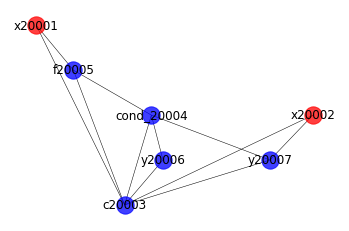

True

In [9]:
model = if_model.model
model.graph.draw_graph()